In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [3]:
df.drop(columns = 'gameId',inplace = True)

In [4]:
print(df)

      blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0            0               28                   2               1   
1            0               12                   1               0   
2            0               15                   0               0   
3            0               43                   1               0   
4            0               75                   4               0   
...        ...              ...                 ...             ...   
9874         1               17                   2               1   
9875         1               54                   0               0   
9876         0               23                   1               0   
9877         0               14                   4               1   
9878         1               18                   0               1   

      blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0             9           6           11                  0            

In [4]:
df['blueTotalCS'] = df.blueTotalJungleMinionsKilled + df.blueTotalMinionsKilled
df['blueNetVision'] = df.blueWardsPlaced - df.redWardsDestroyed
df['blueExperiencePerMin'] = df.blueTotalExperience / 10
df['redTotalCS'] = df.redTotalJungleMinionsKilled + df.blueTotalMinionsKilled
df['redNetVision'] = df.redWardsPlaced - df.redWardsDestroyed
df['redExperiencePerMin'] = df.redTotalExperience / 10

In [5]:
columns_red = [['redTotalExperience','redExperiencePerMin'],['redTotalGold','redGoldPerMin'],['redTotalCS','redCSPerMin']]
columns_blue_2 = [['blueTotalExperience','blueExperiencePerMin'],['blueTotalGold','blueGoldPerMin'],['blueTotalCS','blueCSPerMin'],['blueExperienceDiff','blueGoldDiff']]
columns_blue = [['blueTotalExperience','blueExperiencePerMin'],['blueTotalGold','blueGoldPerMin'],['blueTotalCS','blueCSPerMin']]
pairs = [
    [['blueTotalExperience','redTotalExperience'],['blueExperiencePerMin','redExperiencePerMin']],
    [['blueTotalGold','redTotalGold'],['blueGoldPerMin','redGoldPerMin']],
    [['blueTotalCS','redTotalCS'],['blueCSPerMin','redCSPerMin']]
]

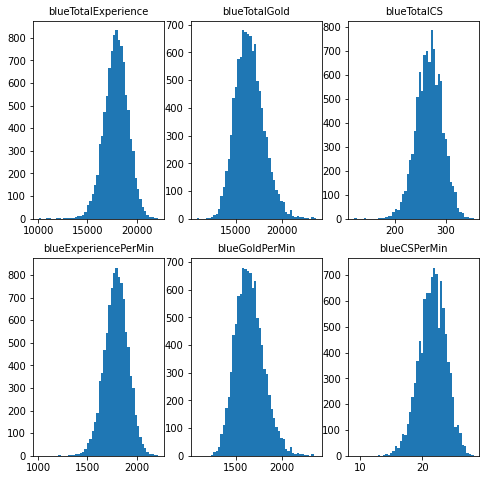

In [8]:
fig, ax = plt.subplots(2,3, figsize=(8,8))
for i, sets in enumerate(columns_blue):
    for j, column in enumerate(columns_blue[i]):
        ax[j,i].hist(df[column],bins=50)
        ax[j,i].set_title(column, fontsize=10)
plt.show()

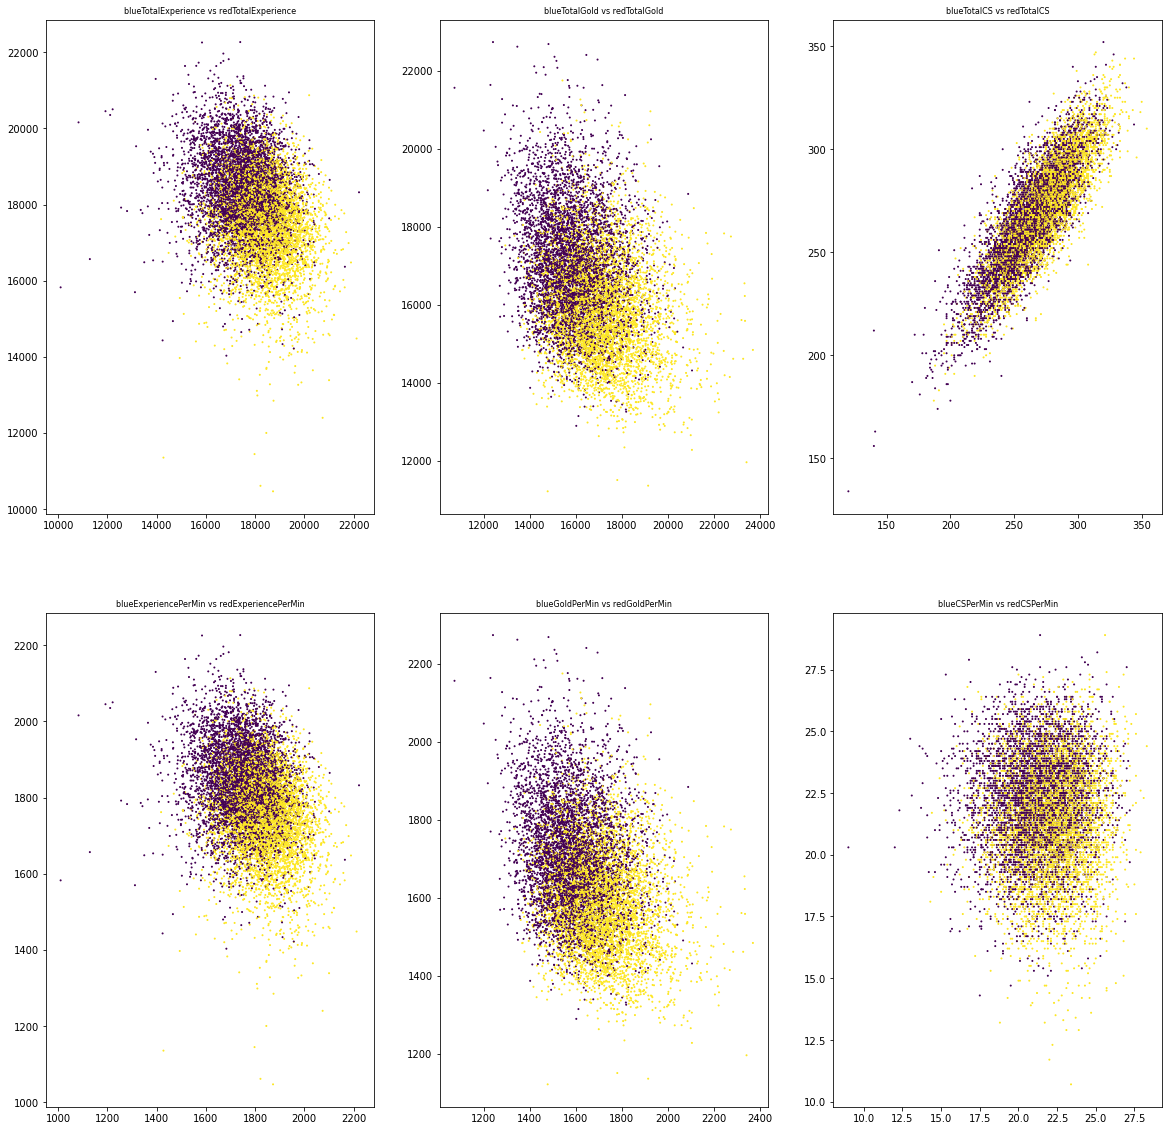

In [9]:
fig, ax = plt.subplots(2,3, figsize = (20,20))
for i,columns in enumerate(pairs):
    for j,column in enumerate(pairs[i]):
        ax[j,i].scatter(df[column[0]],df[column[1]],c = df['blueWins'],s = 1)
        ax[j,i].set_title('{} vs {}'.format(column[0],column[1]), fontsize = 8)
        
plt.show()

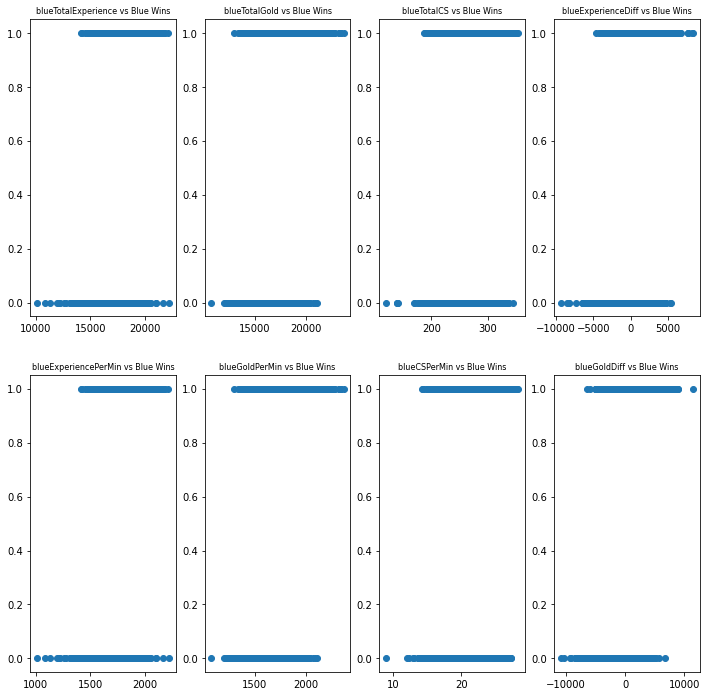

In [9]:
fig, ax = plt.subplots(2,4, figsize = (12,12))
for i,columns in enumerate(columns_blue_2):
    for j,column in enumerate(columns_blue_2[i]):
        ax[j,i].scatter(df[column], df.blueWins)
        ax[j,i].set_title('{} vs Blue Wins'.format(column), fontsize = 8)

plt.show()

It looks like from the data, a gold and experience lead early on is the largest contributor to winning matches. Let's select that as our feature.

# Model Selection

In [4]:
X = df[['blueTotalGold','blueTotalExperience','redTotalGold','redTotalExperience']]
y = df['blueWins']

### Support Vector Machine

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix

In [6]:
model_1 = SVC(kernel='linear',gamma='scale',probability=True,shrinking=True)
model_1.fit(X,y)

SVC(kernel='linear', probability=True)

In [15]:
results_1 = cross_val_score(model_1,X,y,cv=5)
round(np.mean(results_1),2)

0.73

### Random Forest

In [9]:
model_2 = RandomForestClassifier()
model_2.fit(X,y)
cross_val_score(model_2,X,y,cv=5)

array([0.70597166, 0.71255061, 0.69686235, 0.7257085 , 0.71746835])

In [10]:
param_grid_2 = {'n_estimators':np.arange(start=200,stop=300,step=10),
                'min_samples_split':np.arange(start=0,stop=1,step=0.05)}
grid_2 = GridSearchCV(RandomForestClassifier(),param_grid_2,cv=5)

In [11]:
grid_2.fit(X,y)

/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_a

/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_a

/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_a

/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_a

/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_a

/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_a

/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_a

/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_a

/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_a

/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_a

/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_a

/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/radia/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/radia/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_a

KeyboardInterrupt: 

In [ ]:
grid_2.best_params_

In [16]:
model_2_best = RandomForestClassifier(max_depth = 35, min_samples_split = 0.05, n_estimators = 230)
model_2_best.fit(X,y)
results_2 = cross_val_score(model_2_best,X,y,cv=5)
round(np.mean(results_2),2)

0.72

Looks like from our previous models, the best estimator is a support vector classifier.

# Results

Text(80.90000000000006, 0.5, 'Predicted Wins')

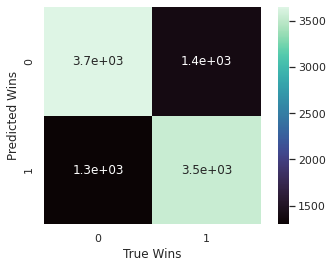

In [35]:
y_model = model_1.predict(X)
plot = confusion_matrix(y_pred = y_model,y_true = y)
sns.heatmap(plot.T,square=True,annot=True,cmap='mako')
plt.xlabel('True Wins')
plt.ylabel('Predicted Wins')

From the plot, our model is more capable of predicting losses over wins.

# Conclusion

Although the chosen estimator is quiet good, the features are not. What should be done is doing some more work in feature selection, since I might miss any important relationships.